In [1]:
# импортируем библиотеки, модули
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [7]:
# функция определения плотности вероятности извлечь деталь, произведенную заданном на станке
# то есть мы задаем параметры станка: мат.ожидание, среднее кв. отклонение
def gaus_func_01(mu,sigma,x):
    return math.e**(-(x-mu)**2/(2*sigma**2)) / (sigma*(2*math.pi)**0.5)

# напишем функцию определения вероятностей принадлежности деталей к станку
def proba_x(X, w1, w2, mu_1, mu_2, sigma_1, sigma_2):
    for i in X:
        P1_x = gaus_func_01(mu_1,sigma_1,i)
        P2_x = gaus_func_01(mu_2,sigma_2,i)
        P_x = w1*P1_x + w2*P2_x
        P_x_1 = (w1*P1_x)/P_x
        P_x_2 = (w2*P2_x)/P_x
        proba_temp = []
        proba_temp.append(P_x_1)
        proba_temp.append(P_x_2)
        proba_X.append(proba_temp)
    return proba_X

# напишем функцию отнесения изделия к тому или станку
def pred_x(proba_X, limit_proba):
    pred_X = []
    for x in proba_X:
        if x[0] >= limit_proba:
            pred_X.append(1)
        else:
            pred_X.append(2)
    return np.array(pred_X)

# напишем функцию построения графиков
def graph_01(X, pred_X, mu_1, sigma_1, mu_2, sigma_2):
    true_pred = []
    false_pred_1 = []
    false_pred_2 = []
    for i in range(X.shape[0]):
        if pred_X[i] == y[i]:
            true_pred.append([X[i], -0.025])
        else:
            if y[i] == 1:
                false_pred_1.append([X[i], -0.0075])
            else:
                false_pred_2.append([X[i], -0.015])

    false_pred_1 = np.array(false_pred_1)            
    false_pred_2 = np.array(false_pred_2)
    true_pred = np.array(true_pred)

    x_theory = np.linspace(42, 85, 20000)
    y_theory_1 = []
    for x in x_theory:
        y_theory_1.append(gaus_func_01(mu_1,sigma_1,x))
    y_theory_2 = []
    for x in x_theory:
        y_theory_2.append(gaus_func_01(mu_2,sigma_2,x))

    plt.figure(figsize=(18, 8))    
    plt.plot(
        x_theory, y_theory_1, color = 'green', lw = 2, label = 'Theoretical probability density for machine 1')
    plt.plot(
        x_theory, y_theory_2, color = 'firebrick', lw = 2, label = 'Theoretical probability density for machine 2')
    plt.hist(
        X[:N1], bins = 'auto', color='#539caf', alpha = 0.35, label = 'machine tool products 1')
    plt.hist(
        X[N1:N], bins = 'auto', color='sandybrown', alpha = 0.75, label = 'machine tool products 2')
    plt.plot(mu_1, 0, 'o', markersize = 11, color = 'blue', label = 'Mu 1')
    plt.plot(mu_2, 0, 'o', markersize = 11, color = 'red', label = 'Mu 2')

    plt.plot([mu_1 - sigma_1, mu_1 - sigma_1], [0,0.85*np.max(y_theory_1)],
             ':', lw = 3, color = 'blue', alpha = 0.55, label = 'Mu1 - sigma1')
    plt.plot([mu_1 + sigma_1, mu_1 + sigma_1], [0,0.85*np.max(y_theory_1)],
             ':', lw = 3, color = 'blue', alpha = 0.55, label = 'Mu1 + sigma1')
    plt.plot([mu_2 - sigma_2, mu_2 - sigma_2], [0,0.85*np.max(y_theory_2)],
             ':', lw = 3, color = 'red', alpha = 0.55, label = 'Mu2 - sigma2')
    plt.plot([mu_2 + sigma_2, mu_2 + sigma_2], [0,0.85*np.max(y_theory_2)],
             ':', lw = 3, color = 'red', alpha = 0.55, label = 'Mu2 + sigma2')

    plt.plot([mu_1 - 2 * sigma_1, mu_1 - 2 * sigma_1], [0, 0.9*0.5 * np.max(y_theory_1)],
             ':', lw = 2.5, color = 'blue', alpha = 0.35, label = 'Mu1 - 2*sigma1')
    plt.plot([mu_1 + 2 * sigma_1, mu_1 + 2 * sigma_1], [0, 0.9*0.5 * np.max(y_theory_1)],
             ':', lw = 2.5, color = 'blue', alpha = 0.35, label = 'Mu1 + 2*sigma1')
    plt.plot([mu_2 - 2 * sigma_2, mu_2 - 2 * sigma_2], [0, 0.9*0.5 * np.max(y_theory_2)],
             ':', lw = 2.5, color = 'red', alpha = 0.35, label = 'Mu2 - 2*sigma2')
    plt.plot([mu_2 + 2 * sigma_2, mu_2 + 2 * sigma_2], [0, 0.9*0.5 * np.max(y_theory_2)],
             ':', lw = 2.5, color = 'red', alpha = 0.35, label = 'Mu2 + 2*sigma2')

    plt.plot(false_pred_1[:,0], false_pred_1[:,1], 'o', markersize = 2.5, color = 'blue', alpha = 0.2, label = 'errors1')
    plt.plot(false_pred_2[:,0], false_pred_2[:,1], 'o', markersize = 2.5, color = 'red', alpha = 0.3, label = 'errors2')
    plt.plot(true_pred[:,0], true_pred[:,1], 'o', markersize = 3, color = 'green', alpha = 0.2, label = 'right answers')

    plt.xlabel('Caliber')
    plt.ylabel('Probability density')
    plt.legend()
    plt.show()

In [10]:
# сформируем начальные условия примера
# количество изделий произведенных на станке №1
N1 = 8000
# количество изделий произведенных на станке №2
N2 = 5000
# количество изделий произведенных на обоих станках
N = N1+N2

# вес изделия станка №1
mu_1 = 13
# стандартное отклонение в весе изделий станка №1
sigma_1 = 0.5

# вес изделия станка №2
mu_2 = 12
# стандартное отклонение в весе изделий станка №2
sigma_2 = 0.7

Доля верно определенных изделий: 0.824
График №1


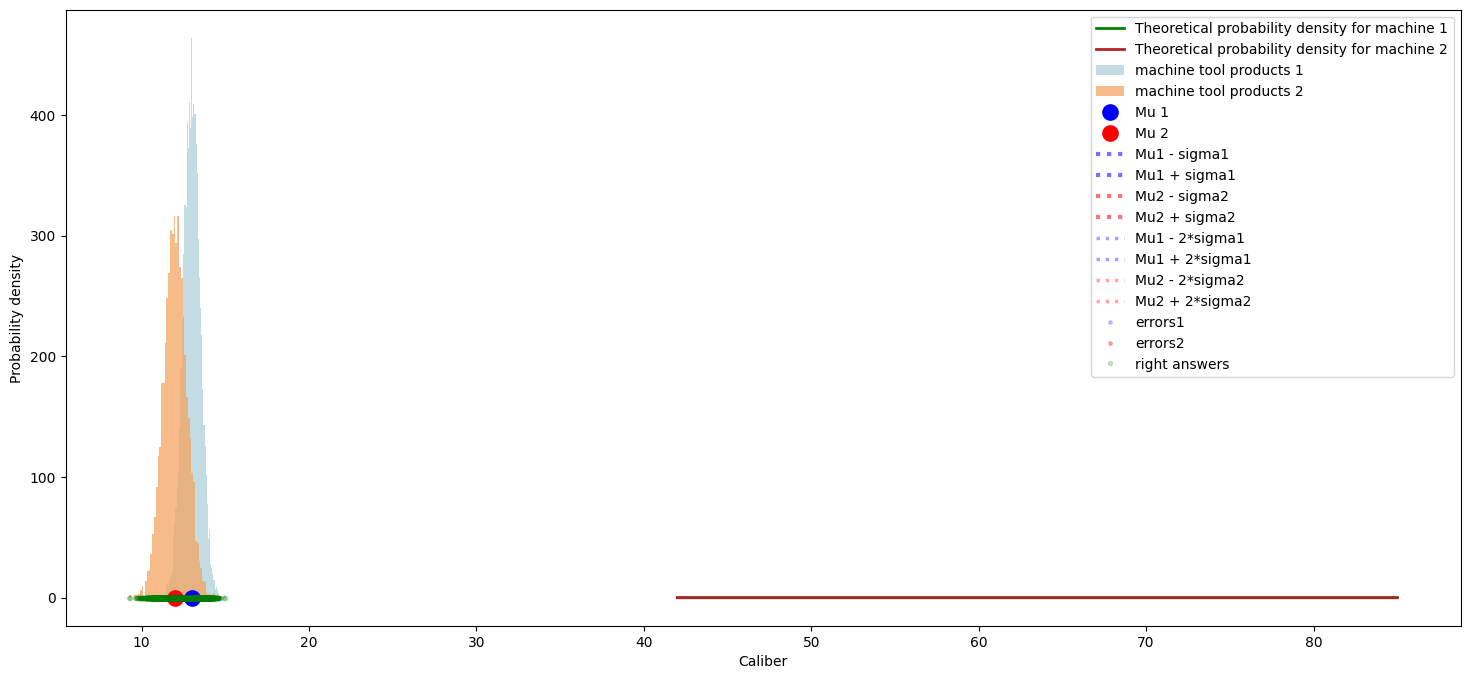

In [11]:
X = np.zeros((N))
np.random.seed(seed=42)
# инициализируем данные по деталям, производства станка №1
X[:N1] = np.random.normal(loc=mu_1, scale=sigma_1, size=N1)
# инициализируем детали, производства станка №2
X[N1:N] = np.random.normal(loc=mu_2, scale=sigma_2, size=N2)

# инициализируем вектор ответов
y = np.zeros((N))
y[:N1] = np.array((1))
y[N1:N] = np.array((2))

# определим априорную вероятность извлечь изделие, произведенное на станке №1
w1 = float(N1)/N
# определим априорную вероятность извлечь изделие, произведенное на станке №2
w2 = float(N2)/N

# для каждой детали определим вероятность принадлежности к тому или иному станку
proba_X = []
proba_X = proba_x(X, w1, w2, mu_1, mu_2, sigma_1, sigma_2)

# установим порог вероятности, при достижении которого, изделие будет относиться к тому или иному станку
limit_proba = 0.5

# определим принадлежность детали к станку
pred_X = []
pred_X = pred_x(proba_X, limit_proba)

# определим качество нашего алгоритма
print ('Доля верно определенных изделий:', round(accuracy_score(y, pred_X),3))
print

print ('График №1')
graph_01(X, pred_X, mu_1, sigma_1, mu_2, sigma_2)